# Zadanie 1

In [1]:
import numpy as np
import numpy.linalg as LA

L = np.array([[0, 3, 2], [0.9, 0, 0], [0, 0.7, 0]])
C = np.array([[0.6, 0, 0],[0, 0.6, 0], [0, 0, 1]]) # zostawiane przy życiu
D = np.array([[0.4, 0, 0],[0, 0.4, 0], [0, 0, 0]]) # połów

L1 = C@L 
dL1, VL1 = LA.eig(L1)

print(dL1)

[ 1.16654999+0.j         -0.583275  +0.22052021j -0.583275  -0.22052021j]


In [2]:
print(VL1)

[[-0.87996138+0.j          0.60915033+0.j          0.60915033-0.j        ]
 [-0.40733714+0.j         -0.49342587-0.18655073j -0.49342587+0.18655073j]
 [-0.24442673+0.j          0.44405367+0.39176773j  0.44405367-0.39176773j]]


In [3]:
dL1[np.argmax(dL1)]

(1.1665499930200112+0j)

In [4]:
print('wektor wlasny: ', VL1[:,np.argmax(dL1)]) # przed unormowaniem

wektor wlasny:  [-0.87996138+0.j -0.40733714+0.j -0.24442673+0.j]


In [5]:
l1 = np.max(dL1)
X = VL1[:,np.argmax(dL1)]
s= X[0] + X[1] + X[2]  
print(s)

#normalizacja X
X_norm = X/s
print(X_norm)

(-1.5317252518592142+0j)
[0.57449035-0.j 0.26593356-0.j 0.15957609-0.j]


In [6]:
print('Populacja będzie się zmieniała co roku o czynnik {} względem roku poprzedniego.'.format(l1))
print('Proporcje poszczególnych klas wiekowych będą opisywane wektorem następującym: {}'.format(X_norm))

Populacja będzie się zmieniała co roku o czynnik (1.1665499930200112+0j) względem roku poprzedniego.
Proporcje poszczególnych klas wiekowych będą opisywane wektorem następującym: [0.57449035-0.j 0.26593356-0.j 0.15957609-0.j]


In [7]:
print('Nasza lambda1 jest większa od 1, czyli po długim czasie populacja rośnie do + oo')

Nasza lambda1 jest większa od 1, czyli po długim czasie populacja rośnie do + oo


# Zadanie 2

1/5
0.350000000000000
0.612500000000000
0.678125000000000
0.563281250000000
0.764257812500000
0.412548828125001
0.721960449218751
0.486569213867186
0.851496124267575


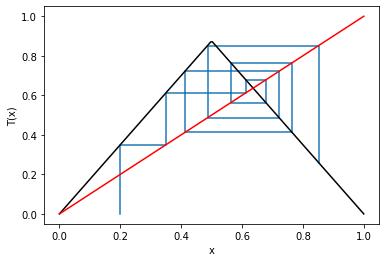

In [15]:
import matplotlib.pyplot as plt
from sympy import Rational

s = Rational(1,5) # punkt początkowy

t = np.linspace(0, 1, 200)
x = np.linspace(0, 1, 200)

mu = 7/4

def tent(mu, x):
    return mu*(-abs(x-Rational(1,2))+Rational(1,2))

inputs = np.array([])
outputs = np.array([])
inputs = np.append(inputs, s)
outputs = np.append(outputs, 0)


for i in range (2, 12):
    inputs = np.append(inputs, s)
    outputs = np.append(outputs, s)
    inputs = np.append(inputs, s)
    outputs = np.append(outputs, tent(mu, s))
    print(s)
    s = tent(mu, s)
    

plt.plot(inputs, outputs)
plt.plot(t, tent(mu, t), 'k')
plt.plot(x,x, 'r')

plt.xlabel('x', fontsize = 10)
plt.ylabel('T(x)', fontsize = 10)
plt.tick_params(labelsize = 10)

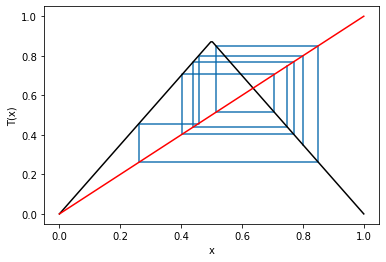

In [28]:
s = Rational(1,5)
inputs = np.array([])
outputs = np.array([])
inputs = np.append(inputs, s)
outputs = np.append(outputs, 0)


for i in range (2, 212):
    inputs = np.append(inputs, s)
    outputs = np.append(outputs, s)
    inputs = np.append(inputs, s)
    outputs = np.append(outputs, tent(mu, s))
    #print(s)
    s = tent(mu, s)
    

plt.plot(inputs[-20:], outputs[-20:])
plt.plot(t, tent(mu, t), 'k')
plt.plot(x,x, 'r')

plt.xlabel('x', fontsize = 10)
plt.ylabel('T(x)', fontsize = 10)
plt.tick_params(labelsize = 10)

In [19]:
len(inputs)

421

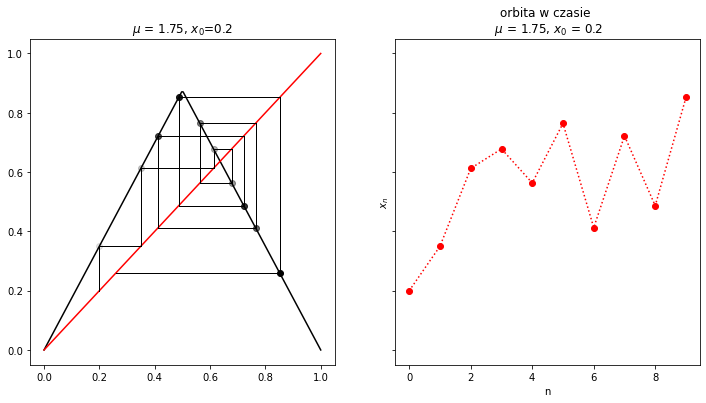

In [30]:
def tent(mu, x):
    return mu*(-abs(x-1/2)+1/2)

x = np.linspace(0,1,200)

def tent_cobweb(mu, x0, N, ax = None):
    t = np.linspace(0,1, 200)
    ax.plot(t, tent(mu, t), 'k')
    ax.plot([0,1], [0,1], 'r')
    x = x0
    for i in range(N):
        y = tent(mu, x)
        ax.plot([x,x], [x,y], 'k', lw = 1)
        ax.plot([x,y], [y,y], 'k', lw = 1)
        ax.plot([x], [y], 'ok', alpha = (i+1)/ N)
        x = y
    ax.set_title(f'$\mu$ = {mu}, $x_0$={x0}' )

def tent_iterations(mu, x0, N, ax = None):
    x_orbit = [x0]
    x = x0
    for i in range(N-1):
        x = tent(mu, x)
        x_orbit.append(x)
    plt.plot(x_orbit, 'o:r')
    ax.set_title(f'orbita w czasie \n $\mu$ = {mu}, $x_0$ = {x0}')
    plt.xlabel('n')
    plt.ylabel('$x_n$')
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6), sharey = True)
tent_cobweb(7/4, 0.2, 10, ax = ax1)
tent_iterations(7/4, 0.2, 10, ax = ax2)

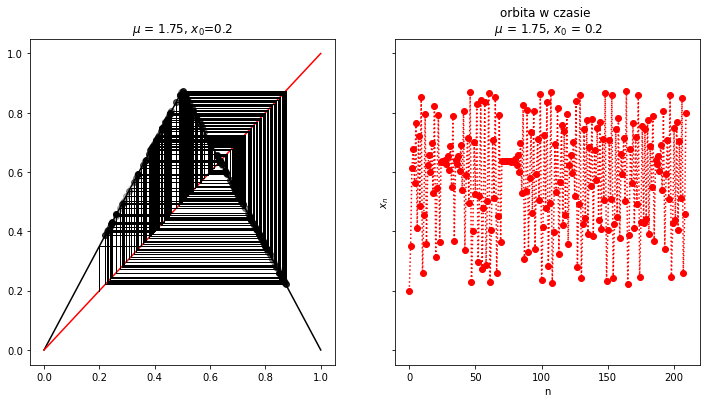

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6), sharey = True)
tent_cobweb(7/4, 0.2, 210, ax = ax1)
tent_iterations(7/4, 0.2, 210, ax = ax2)

# Zadanie 3

In [32]:
from math import e

def gauss(alpha, beta, x):
    return e**(-alpha*x**2) + beta

def cobweb (alpha, beta, x0, n, ax = None):
    t = np.linspace(-1, 1, 500)
    ax.plot(t, gauss(alpha, beta, t), 'k', lw = 2)
    ax.plot([-1,1], [-1,1], 'r', lw = 2)
    x = x0
    for i in range(n):
        y = gauss(alpha, beta, x)
        ax.plot([x,x], [x, y], 'k', lw = 1)
        ax.plot([x,y], [y, y], 'k', lw = 1)
        ax.plot([x], [y], 'ok', ms = 10, alpha = (i+1) / n)
        x = y
    #ax.set_xlim(-1, 1)
    #ax.set_ylim(-1, 1)
    ax.set_title(f'$\\alpha$={alpha}, $\\beta = {beta}$, $x_0$={x0}')

def gauss_iteration(alpha, beta, x0, n, ax = None):
    x = x0
    x_list = [x0]
    for i in range(n-1):
        x = gauss(alpha, beta, x)
        x_list.append(x)
    plt.plot(x_list, 'o:r')
    ax.set_title(f'$\\alpha$={alpha}, $\\beta = {beta}$, $x_0$={x0}')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6 ), sharey = True)
cobweb(5, -0.5, -0.75, 100, ax = ax1)
gauss_iteration(5, -0.5, -0.75, 100, ax = ax2)
plt.style.use('seaborn-whitegrid')

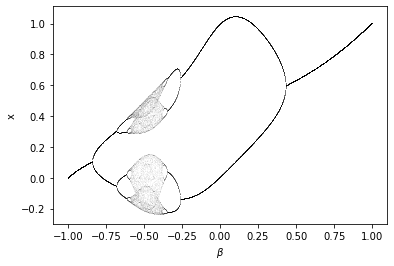

In [33]:
alpha = 5

y = []
beta_values = np.linspace(-1, 1, 2000)
for beta in beta_values:
    x = 0.1
    for i in range(500):
        x = gauss(alpha, beta, x)
    for i in range(50):
        x = gauss(alpha, beta, x)
        y.append([beta, x])
y = np.array(y)
plt.plot(y[:, 0], y[:, 1], 'k.', ms = 0.02)
plt.xlabel('$\\beta$', fontsize = 10)
plt.ylabel('x', fontsize = 10)
plt.tick_params(labelsize = 10)

In [16]:
# jest tu pewne zachowanie chaotyczne dla beta = -0.5 i alfa = 5
#są dwa przedziały chaosu i pewne przerwy między nimi

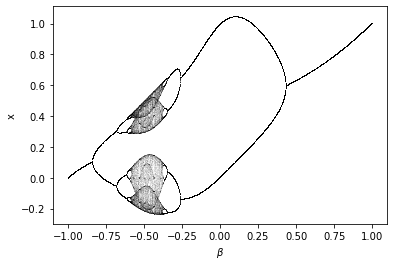

In [37]:
alpha = 5

y = []
beta_values = np.linspace(-1, 1, 2000)
for beta in beta_values:
    x = 0.1
    for i in range(500):
        x = gauss(alpha, beta, x)
    for i in range(220):
        x = gauss(alpha, beta, x)
        y.append([beta, x])
y = np.array(y)
plt.plot(y[:, 0], y[:, 1], 'k.', ms = 0.02)
plt.xlabel('$\\beta$', fontsize = 10)
plt.ylabel('x', fontsize = 10)
plt.tick_params(labelsize = 10)

# Zadanie 4

In [40]:
from math import sqrt
def f1(x,y):
    return (x/2, y/2)
def f2(x,y):
    return ((x+1)/2, y/2)
def f3(x,y):
    return ((x+1/2)/2, (y+sqrt(3)/2)/ 2)

In [74]:
IFS = [f1, f2, f3]
num = 300000
width = height = 10000
trojkat = np.zeros((width, height)) 
x, y = 0,0
for i in range(num):
    f = np.random.choice(IFS, p = [1/3, 1/3, 1/3]) # p - rozklad prawdop zbioru IFS
    x, y = f(x, y)
    cx, cy = int(width/2+x*width/10), int(y*height/10)
    trojkat[cy, cx] = 1

(10000.0, 9000.0)

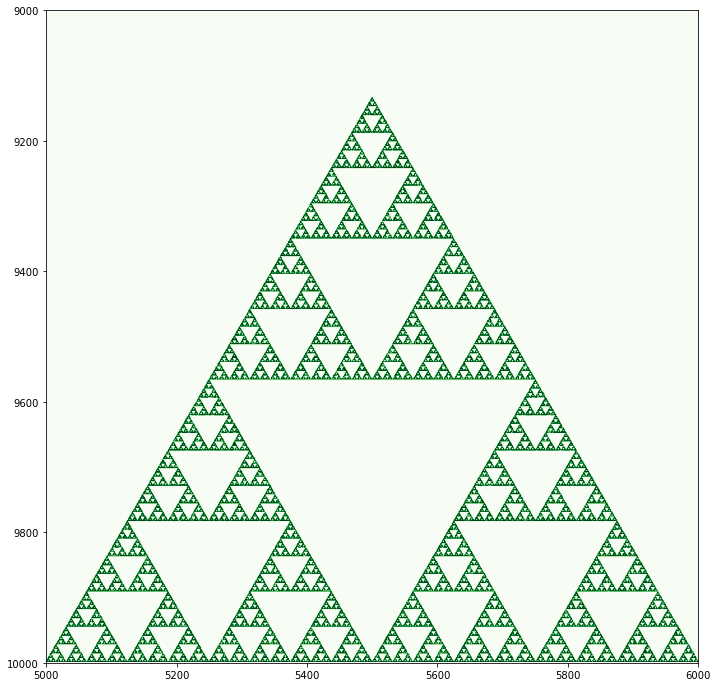

In [77]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize = (12,12))
plt.imshow(trojkat[::-1, :], cmap = cm.Greens)
plt.xlim(5000,6000)
plt.ylim(10000,9000)
#ax.axis('off')